#1 데이터 및 라이브러리 임포트

In [ ]:
from google.colab import drive
drive.mount('/content/drive') 

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.tsa.filters.hp_filter

#2 분기별 소비자지출 시각화

In [ ]:
consumer = pd.read_excel('/content/drive/MyDrive/DSL/EDA2023-1/가계소비지출.xlsx')
consumer = consumer[:-1] #마지막행 결측치라 삭제
consumer.columns = ['Date', 'Expenditure'] #칼럼명 변경
consumer['Quarter'] = [x[-1] for x in consumer['Date']] #분기 칼럼
consumer['Year'] = [x[:4] for x in consumer['Date']] #연도 칼럼
consumer['Log_Expenditure'] = np.log(consumer['Expenditure']).astype('float') #로그 지출: 지출 단위가 너무 커서 로그 변환해서 줄였음: 보통 이렇게 많이 합니다.
cycle, trend = statsmodels.tsa.filters.hp_filter.hpfilter(consumer['Log_Expenditure'], lamb=1600) # HP filter로 추세는 제거하였음
consumer['Log_Expenditure_Cycle'] = cycle #추세 제거된 소비지출 칼럼
consumer

,Date,Expenditure,Quarter,Year,Log_Expenditure,Log_Expenditure_Cycle
0,1991/Q1,72217.1,1,1991,11.187432,-0.001444
1,1991/Q2,72410.3,2,1991,11.190104,-0.018215
2,1991/Q3,73286.7,3,1991,11.202134,-0.025626
3,1991/Q4,79844.5,4,1991,11.287836,0.040647
4,1992/Q1,78983.8,1,1992,11.276998,0.010421
...,...,...,...,...,...,...
122,2021/Q3,213090.3,3,2021,12.269471,-0.008936
123,2021/Q4,220848.6,4,2021,12.305233,0.023461
124,2022/Q1,216198.2,1,2022,12.283951,-0.001247
125,2022/Q2,217379.0,2,2022,12.289398,0.000733


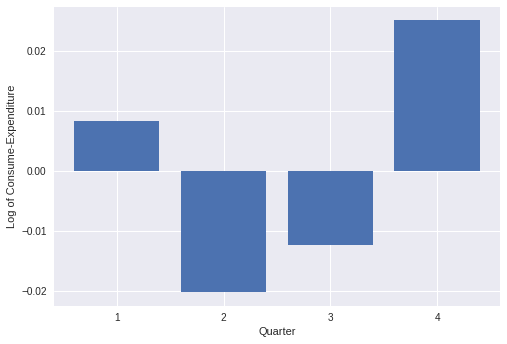

In [ ]:
df = pd.DataFrame(consumer.groupby('Quarter')['Log_Expenditure_Cycle'].mean()).reset_index() 
plt.bar(df['Quarter'], df['Log_Expenditure_Cycle'])
plt.xlabel('Quarter')
plt.ylabel('Log of Consume-Expenditure')
plt.style.use('seaborn')
plt.grid(visible=True, axis = 'y')
plt.show()

#3. 가설검정: 4분기 가계소비지출 평균이 1~3분기 가계소비지출의 평균보다 크다.

In [ ]:
#샘플 준비

consume_4 = consumer[consumer['Quarter']=='4']['Log_Expenditure_Cycle']
consume_other = list(consumer[consumer['Quarter']!='4'].groupby('Year')['Log_Expenditure_Cycle'].mean())

In [ ]:
#표본 평균

mean_4 = np.mean(consume_4)
mean_other = np.mean(consume_other)

In [ ]:
#표본 표준편차

sd_4 = np.std(consume_4)
sd_other = np.std(consume_other)

In [ ]:
#표본 크기

n_4 = len(consume_4)
n_other = len(consume_other)

In [ ]:
#표준오차

sd_total = sd_4**2/n_4 + sd_other**2/n_other

In [ ]:
#t 통계량

t = (mean_4 - mean_other)/np.sqrt(sd_total)
t

4.3180703531276

In [ ]:
#p-value: 귀무가설 기각

1 - stats.norm.cdf(t)

7.86996316237687e-06